Data understanding and Exploration


In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import warnings 
from IPython.display import Image
import sys, os
import matplotlib as plt



sys.path.append("..")

from scripts.missing_values import *
from scripts.utilities import *



In [2]:
# load the data in a dataframe
df = pd.read_csv('../data/Week1_challenge_data_source.csv')
description = pd.read_csv('../data/field_descriptions.csv')

In [3]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
# names of the columns and what they describe
description

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


Data Cleaning and Handling Missing Values

In [5]:
# finding the columns
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [6]:
len(df.columns)

55

In [7]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [8]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


In [9]:
# total number of missing values
df.isnull().sum().sum()

1031392

Handling missing values


In [10]:
percent_missing(df)

The dataset contains 12.5 % missing values.


In [11]:
# check the columns with missing values
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [12]:
# calculate the percentage of missing values
# to know which columns has the most missing values drop
prcnt_missing = df.isnull().sum() * 100/ len(df)
missing_df = pd.DataFrame({'%/ of missing values': prcnt_missing})
missing_df

,%/ of missing values
Bearer Id,0.660662
Start,0.000667
Start ms,0.000667
End,0.000667
End ms,0.000667
Dur. (ms),0.000667
IMSI,0.379997
MSISDN/Number,0.710662
IMEI,0.381331
Last Location Name,0.768662


In [13]:
# dropping columns with missing values more than 30%
prcnt = 30.0       # the percent of missing values to remove
min_amount = int(((100-prcnt)/100) * df.shape[0]+1)
modified_df = df.dropna(axis=1, thresh=min_amount)
print("Modified Dataframe Columns: ")
modified_df.columns.tolist()

Modified Dataframe Columns: 


['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (By

In [14]:
modified_df.shape

(150001, 45)

In [15]:
#modified_df['Start'].dtype
modified_df['End'].dtype  

dtype('O')

In [16]:
# converting start and end to datetime data type
modified_df['Start']=pd.to_datetime(modified_df['Start'])
modified_df['End']=pd.to_datetime(modified_df['End'])
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       149010 non-null  float64       
 1   Start                           150000 non-null  datetime64[ns]
 2   Start ms                        150000 non-null  float64       
 3   End                             150000 non-null  datetime64[ns]
 4   End ms                          150000 non-null  float64       
 5   Dur. (ms)                       150000 non-null  float64       
 6   IMSI                            149431 non-null  float64       
 7   MSISDN/Number                   148935 non-null  float64       
 8   IMEI                            149429 non-null  float64       
 9   Last Location Name              148848 non-null  object        
 10  Avg RTT DL (ms)                 122172 non-null  float64

In [17]:
#modified_df = modified_df.dropna(axis=0)
#modified_df.shape

In [18]:
# dropped rows with missing values at specific columns
modified_df= modified_df.dropna(subset=['Bearer Id','Start','End','IMSI','MSISDN/Number'])
modified_df.shape

(148506, 45)

In [19]:
modified_df.isna().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  160
Avg RTT DL (ms)                   27636
Avg RTT UL (ms)                   27616
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 712
50 Kbps < DL TP < 250 Kbps (%)      712
250 Kbps < DL TP < 1 Mbps (%)       712
DL TP > 1 Mbps (%)                  712
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [20]:
percent_missing(modified_df)

The dataset contains 0.94 % missing values.


In [21]:
modified_df.skew(axis=0)

Bearer Id                           0.021237
Start ms                            0.000563
End ms                             -0.000781
Dur. (ms)                           3.968797
IMSI                             -269.349864
MSISDN/Number                     331.677128
IMEI                                1.068191
Avg RTT DL (ms)                    66.662058
Avg RTT UL (ms)                    28.622886
Avg Bearer TP DL (kbps)             2.589861
Avg Bearer TP UL (kbps)             4.499001
DL TP < 50 Kbps (%)                -2.301697
50 Kbps < DL TP < 250 Kbps (%)      3.281417
250 Kbps < DL TP < 1 Mbps (%)       4.576173
DL TP > 1 Mbps (%)                  5.358695
UL TP < 10 Kbps (%)                -8.995678
10 Kbps < UL TP < 50 Kbps (%)      10.959567
50 Kbps < UL TP < 300 Kbps (%)     21.857128
UL TP > 300 Kbps (%)               36.095001
Activity Duration DL (ms)           5.852521
Activity Duration UL (ms)           7.357988
Dur. (ms).1                         3.968797
Nb of sec 

In [22]:
with warnings.catch_warnings(record=True):
    modified_df = handle_missing_values(modified_df)
    filled_df = fill_missing_values(modified_df)
    filled_df.head()

In [23]:
type(filled_df)

pandas.core.frame.DataFrame

In [24]:
filled_df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,45.0,5.0,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,45.0,5.0,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,45.0,5.0,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [25]:
percent_missing(filled_df)

The dataset contains 0.0 % missing values.


In [26]:
filled_df.sample(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
20716,1.304243e+19,2019-04-24 20:12:00,245.0,2019-04-25 00:30:00,258.0,15488.0,2.082003e+14,3.363488e+10,3.580181e+13,D79188A,24.0,1.0,301.0,168.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,5734.0,5752.0,15488013.0,Samsung,Samsung Galaxy S4 Mini (Gt-I9195),45.0,44.0,1793369.0,58636.0,4466745.0,3153369.0,446421.0,650658.0,6296930.0,21183811.0,16537137.0,3447740.0,771302637.0,6230539.0,361051466.0,14702350.0,49427103.0,800843239.0
46289,7.349883e+18,2019-04-25 07:08:00,787.0,2019-04-26 10:22:00,938.0,97990.0,2.082010e+14,3.366035e+10,3.552121e+13,L50549B,45.0,5.0,52.0,46.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,20912.0,22410.0,97990151.0,Samsung,Samsung Galaxy A5 Sm-A520F,104.0,116.0,3169110.0,47933.0,9133103.0,1944979.0,3223007.0,420643.0,21390002.0,17986604.0,3762432.0,12431639.0,262131516.0,16060458.0,231010960.0,6647951.0,55540207.0,302809170.0
80992,7.277826e+18,2019-04-27 08:48:00,369.0,2019-04-28 02:06:00,207.0,62320.0,2.082009e+14,3.369990e+10,3.563971e+13,D50709C,32.0,7.0,17374.0,1312.0,92.0,5.0,1.0,0.0,95.0,3.0,0.0,0.0,425483.0,406985.0,62320838.0,Samsung,Samsung Galaxy S7 (Sm-G930X),1041.0,936.0,3439780.0,7178.0,5948753.0,1472366.0,397008.0,186900.0,12580257.0,1138347.0,2992857.0,3122073.0,100296518.0,3198796.0,365968249.0,12017857.0,21143517.0,125655173.0
87696,7.277826e+18,2019-04-27 12:54:00,872.0,2019-04-28 03:18:00,997.0,51826.0,2.082015e+14,3.376318e+10,3.532691e+13,D10933B,125.0,11.0,5427.0,744.0,95.0,3.0,1.0,0.0,99.0,0.0,0.0,0.0,475477.0,467054.0,51826125.0,Apple,Apple iPhone 6S (A1688),1876.0,1920.0,941527.0,15023.0,3624905.0,2263214.0,3068444.0,371010.0,9330580.0,3109264.0,19438671.0,9562829.0,577183265.0,15328152.0,837605632.0,15730616.0,46380108.0,613587392.0
85136,1.304243e+19,2019-04-27 11:22:00,168.0,2019-04-28 01:09:00,811.0,49651.0,2.082015e+14,3.366252e+10,3.585131e+13,D11280A,31.0,5.0,25749.0,659.0,82.0,15.0,1.0,0.0,99.0,0.0,0.0,0.0,580699.0,594257.0,49651643.0,Samsung,Samsung Galaxy J1 (Sm-J120X),2260.0,2583.0,1162012.0,14456.0,10563840.0,1463415.0,2711901.0,10981.0,6726931.0,12687131.0,14681269.0,8452388.0,722779096.0,12475933.0,654902677.0,3396987.0,38501291.0,758625049.0
17032,7.349883e+18,2019-04-24 19:21:00,342.0,2019-04-25 00:33:00,553.0,18678.0,2.082014e+14,3.364560e+10,3.546391e+13,D50119B,45.0,5.0,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,18678211.0,Samsung,Samsung Galaxy A3 (Sm-A320),11.0,11.0,262803.0,49392.0,99704.0,3548951.0,573833.0,85688.0,3217278.0,6367878.0,9609256.0,11786588.0,511363296.0,993446.0,789312541.0,9098623.0,31930566.0,525126170.0
133645,1.311448e+19,2019-04-28 19:17:00,316.0,2019-04-30 10:32:00,58.0,141285.0,2.082017e+14,3.376217e+10,8.679050e+13,L85992A,74.0,4.0,63.0,47.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,8038.0,10161.0,141285742.0,Huawei,Huawei P20 Lite Huawei Nova 3E,25.0,25.0,1876804.0,57041.0,219797.0,144515.0,3583792.0,297525.0,9811572.0,10942872.0,18094847.0,13673134.0,787206951.0,3402908.0,175373680.0,6068879.0,34586874.0,820793763.0
2405,1.304243e+19,2019-04-24 02:37:00,930.0,2019-04-25 02:37:00,932.0,86400.0,2.082003e+14,3.362731e+10,3.544111e+13,L77666C,46.0,11.0,128.0,46.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,17619.0,11631.0,86400002.0,Apple,Ap

In [27]:
filled_df.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [28]:
# Creating a csv file with the fillled dataframe

filled_df.to_csv('../data/clean_telecom_data.csv', index=False)

In [29]:
clean_df = pd.read_csv('../data/clean_telecom_data.csv')

In [30]:
prt = clean_df.isnull().sum() * 100/ len(clean_df)
missing = pd.DataFrame({'%/ of missing values': prt})
missing

,%/ of missing values
Bearer Id,0.0
Start,0.0
Start ms,0.0
End,0.0
End ms,0.0
Dur. (ms),0.0
IMSI,0.0
MSISDN/Number,0.0
IMEI,0.0
Last Location Name,0.0


In [31]:
clean_df.shape

(148506, 45)

Handset Overview Analysis

In [32]:
# Top ten handsets used by customers
top_handsets = pd.DataFrame({'number of users':clean_df.groupby(['Handset Type'])['Bearer Id'].count()}).reset_index()
top_handsets = top_handsets.sort_values(['number of users'],ascending=False)
print("\n### The top ten handsets use by customers ###\n")
top_handsets.head(10)


### The top ten handsets use by customers ###



,Handset Type,number of users
315,Huawei B528S-23A,19727
53,Apple iPhone 6S (A1688),9395
49,Apple iPhone 6 (A1586),8993
1390,undefined,8904
59,Apple iPhone 7 (A1778),6279
73,Apple iPhone Se (A1723),5165
66,Apple iPhone 8 (A1905),4977
78,Apple iPhone Xr (A2105),4556
951,Samsung Galaxy S8 (Sm-G950F),4464
75,Apple iPhone X (A1901),3806


<AxesSubplot:title={'center':'Top 10 Headset Types Used by Users'}>

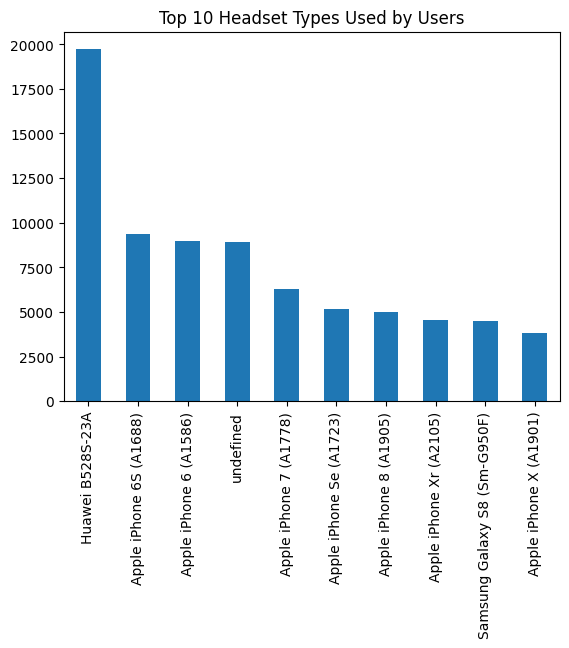

In [33]:
clean_df['Handset Type'].value_counts()[0:10].plot(kind='bar', title='Top 10 Headset Types Used by Users')

In [34]:
clean_df[clean_df['Handset Type']=='undefined']['Handset Type']

3         undefined
5         undefined
7         undefined
10        undefined
44        undefined
            ...    
148458    undefined
148474    undefined
148482    undefined
148487    undefined
148501    undefined
Name: Handset Type, Length: 8904, dtype: object

<AxesSubplot:title={'center':'Top 10 Headsets Types Used by Users'}>

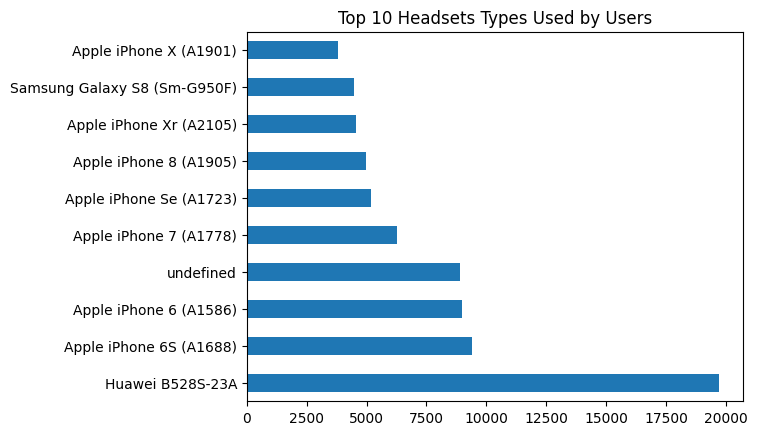

In [35]:
clean_df['Handset Type'].value_counts()[0:10].plot(kind='barh', title='Top 10 Headsets Types Used by Users')


In [36]:
# Top 3 handset manufacturers
top_handset_manf = pd.DataFrame({'handsets manufactured':clean_df.groupby(['Handset Manufacturer'])['Bearer Id'].count()}).reset_index()
top_handset_manf = top_handset_manf.sort_values(['handsets manufactured'],ascending=False).reset_index()
print('\n### The Top 3 Handset Manufacturers ###\n')
top_handset_manf.head(3)


### The Top 3 Handset Manufacturers ###



,index,Handset Manufacturer,handsets manufactured
0,5,Apple,59339
1,103,Samsung,40429
2,52,Huawei,34296


<AxesSubplot:title={'center':'Top 3 Headset Manufacturers'}>

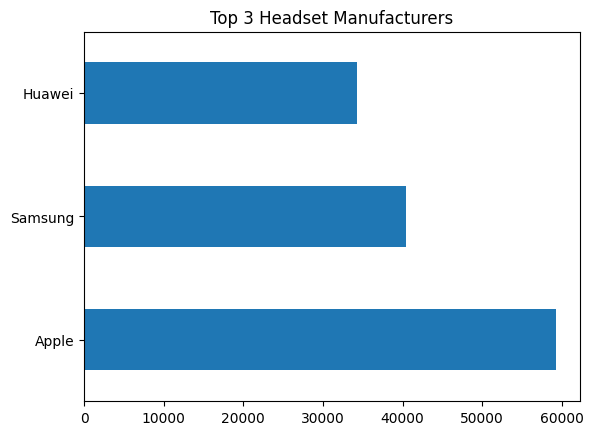

In [37]:
clean_df['Handset Manufacturer'].value_counts()[0:3].plot(kind='barh',title='Top 3 Headset Manufacturers')

In [38]:
# Top 5 handsets per top 3 manufacturers
handsets_from_apple = clean_df.groupby(['Handset Manufacturer']).get_group('Apple')[['Handset Type','Bearer Id']].sort_values(by='Bearer Id', ascending=False)
print(handsets_from_apple.head(5)) 

                       Handset Type     Bearer Id
117402  Apple iPhone 7 Plus (A1784)  1.318654e+19
117290  Apple iPhone 7 Plus (A1784)  1.318654e+19
92346        Apple iPhone 6 (A1549)  1.318654e+19
91110       Apple iPhone Se (A1723)  1.318654e+19
90950       Apple iPhone 6S (A1688)  1.318654e+19


In [39]:
handsets_from_huawei = clean_df.groupby(['Handset Manufacturer']).get_group('Huawei')[['Handset Type','Bearer Id']].sort_values(by='Bearer Id', ascending=False)
print(handsets_from_huawei.head(5)) 

            Handset Type     Bearer Id
142980    Huawei P20 Pro  1.318654e+19
136804  Huawei B525S-23A  1.318654e+19
136203  Huawei B525S-23A  1.318654e+19
130974    Huawei P20 Pro  1.318654e+19
120643  Huawei B525S-23A  1.318654e+19


In [40]:
handsets_from_samsung = clean_df.groupby(['Handset Manufacturer']).get_group('Samsung')[['Handset Type','Bearer Id']].sort_values(by='Bearer Id', ascending=False)
print(handsets_from_samsung.head(5)) 

                             Handset Type     Bearer Id
116469       Samsung Galaxy S7 (Sm-G930X)  1.318654e+19
96053                   Samsung Galaxy J6  1.318654e+19
89698   Samsung Galaxy S9 Plus (Sm-G965F)  1.318654e+19
86534        Samsung Galaxy S8 (Sm-G950F)  1.318654e+19
85081         Samsung Galaxy J3 (Sm-J330)  1.318654e+19


User Overview Analysis

In [41]:
# The number of xdr session per user
xdr_session = clean_df.groupby('MSISDN/Number').agg({'Bearer Id': 'count' }).reset_index()
xdr_session['num_xdr_session'] = xdr_session['Bearer Id']
xdr2 = xdr_session.groupby('MSISDN/Number').agg({'num_xdr_session': 'sum'}).reset_index()
print('Number of xDR Session of The First 20 MSISDN/Numbers')
xdr2.head(20)

Number of xDR Session of The First 20 MSISDN/Numbers


,MSISDN/Number,num_xdr_session
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2
5,3.360101e+10,2
6,3.360101e+10,2
7,3.360101e+10,1
8,3.360101e+10,2
9,3.360102e+10,1


In [42]:
# Session duration per user
session_duration = clean_df.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum',}).reset_index()
print('Session Duration of The First 20 MSISDN/Number')
session_duration.head(20)

Session Duration of The First 20 MSISDN/Number


,MSISDN/Number,Dur. (ms)
0,3.360100e+10,116720.0
1,3.360100e+10,181230.0
2,3.360100e+10,134969.0
3,3.360101e+10,49878.0
4,3.360101e+10,37104.0
5,3.360101e+10,253983.0
6,3.360101e+10,128360.0
7,3.360101e+10,86399.0
8,3.360101e+10,495702.0
9,3.360102e+10,124854.0


In [43]:
# the total download (DL) and upload (UL) data
clean_df['Total(DL/UL)'] = clean_df['Total DL (Bytes)'] + clean_df['Total UL (Bytes)']
total_ul_dl = clean_df.groupby('MSISDN/Number').agg({'Total(DL/UL)':'sum'}).reset_index()
print('The Total Download AND Upload Data for The Top 20 MSISDN/Numbers')
clean_df['Total(DL/UL)'][0]


The Total Download AND Upload Data for The Top 20 MSISDN/Numbers


345629377.0

In [44]:
# the total data volume (in Bytes) during this session for each application
# Adding UL and DL columns to create their SUM column  

clean_df['Other(UL/DL)'] = clean_df['Other UL (Bytes)'] + clean_df['Other DL (Bytes)']
clean_df['Gaming(UL/DL)'] = clean_df['Gaming UL (Bytes)'] + clean_df['Gaming DL (Bytes)']
clean_df['Netflix(UL/DL)'] = clean_df['Netflix UL (Bytes)'] + clean_df['Netflix DL (Bytes)']
clean_df['Youtube(UL/DL)'] = clean_df['Youtube UL (Bytes)'] + clean_df['Youtube DL (Bytes)']
clean_df['Email(UL/DL)'] = clean_df['Email UL (Bytes)'] + clean_df['Email DL (Bytes)']
clean_df['Google(UL/DL)'] = clean_df['Google UL (Bytes)'] + clean_df['Google DL (Bytes)']
clean_df['Social Media(UL/DL)'] = clean_df['Social Media UL (Bytes)'] + clean_df['Social Media DL (Bytes)']
#clean_df.head()
# Convert the columns in bytes to megabytes
clean_df['Total(DL/UL)'] = convert_bytes_to_megabytes(clean_df, 'Total(DL/UL)')
clean_df['Social Media(UL/DL)'] = convert_bytes_to_megabytes(clean_df,'Social Media(UL/DL)')
clean_df['Google(UL/DL)'] = convert_bytes_to_megabytes(clean_df,'Google(UL/DL)')
clean_df['Email(UL/DL)'] = convert_bytes_to_megabytes(clean_df,'Email(UL/DL)')
clean_df['Youtube(UL/DL)'] = convert_bytes_to_megabytes(clean_df,'Youtube(UL/DL)')
clean_df['Netflix(UL/DL)'] = convert_bytes_to_megabytes(clean_df,'Netflix(UL/DL)')
clean_df['Gaming(UL/DL)'] = convert_bytes_to_megabytes(clean_df,'Gaming(UL/DL)')
clean_df['Netflix(UL/DL)'] = convert_bytes_to_megabytes(clean_df,'Netflix(UL/DL)')
clean_df['Other(UL/DL)'] = convert_bytes_to_megabytes(clean_df,'Other(UL/DL)')
clean_df.head()




,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total(DL/UL),Other(UL/DL),Gaming(UL/DL),Netflix(UL/DL),Youtube(UL/DL),Email(UL/DL),Google(UL/DL),Social Media(UL/DL)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,337528.688477,176326.995117,285572.708008,17.028033,17925.725586,3614.554688,2837.804688,1533.383789
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,690610.699219,529257.209961,595625.764648,33.917947,38436.644531,915.415039,4310.640625,1887.966797
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,45.0,5.0,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,300479.465820,405183.936523,224590.088867,22.650911,33618.395508,3284.300781,9989.374023,1685.817383
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,45.0,5.0,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,868508.542969,743981.656250,791394.409180,14.393414,35678.481445,2022.444336,11534.922852,642.083008
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,45.0,5.0,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,593438.870117,551386.544922,518786.180664,16.727256,33420.168945,2060.887695,7567.229492,891.394531


In [45]:
total_apps_data = clean_df.groupby('MSISDN/Number').agg({'Social Media(UL/DL)':'sum', 'Google(UL/DL)':'sum',
                                               'Email(UL/DL)':'sum', 'Youtube(UL/DL)':'sum', 'Netflix(UL/DL)':'sum',
                                              'Gaming(UL/DL)':'sum', 'Other(UL/DL)':'sum'}).reset_index()

print('The Total Data Volume For Each Application')
total_apps_data.head(10)

The Total Data Volume For Each Application


,MSISDN/Number,Social Media(UL/DL),Google(UL/DL),Email(UL/DL),Youtube(UL/DL),Netflix(UL/DL),Gaming(UL/DL),Other(UL/DL)
0,3.360100e+10,2179.819336,4286.137695,1300.158203,21117.722656,25.921803,7.934167e+05,3.775106e+05
1,3.360100e+10,2598.208008,5209.827148,3230.254883,12140.842773,10.701907,1.169434e+05,2.751075e+05
2,3.360100e+10,3120.725586,3362.427734,3130.253906,20833.564453,18.457317,5.261989e+05,4.899352e+05
3,3.360101e+10,273.724609,9451.653320,2231.123047,6813.790039,1.852123,3.819591e+05,3.445283e+04
4,3.360101e+10,2844.279297,18066.031250,3227.997070,40559.572266,46.922421,1.283982e+06,7.859419e+05
5,3.360101e+10,3704.015625,14905.404297,7664.644531,33542.111328,28.911115,4.996443e+05,4.808328e+05
6,3.360101e+10,2704.713867,9957.424805,1327.108398,25811.850586,43.690106,5.356065e+05,2.196179e+05
7,3.360101e+10,1740.910156,11741.810547,2163.635742,18449.941406,14.584389,2.757465e+05,1.740249e+05
8,3.360101e+10,5164.731445,13802.940430,4492.016602,61956.837891,51.704518,8.135625e+05,1.017464e+06
9,3.360102e+10,934.350586,12632.000977,2718.046875,27900.109375,33.879348,6.319294e+05,1.350969e+05


Non-Graphical Univariate

In [46]:
# display the aggregate of user over view analysis
pd.set_option('display.float_format', lambda x: '%.1f' % x)

univariate_analysis = clean_df.groupby('MSISDN/Number').agg({'Bearer Id':'count','Dur. (ms)':'sum', 'Social Media(UL/DL)':'sum', 'Google(UL/DL)':'sum',
                                               'Email(UL/DL)':'sum', 'Youtube(UL/DL)':'sum', 'Netflix(UL/DL)':'sum',
                                              'Gaming(UL/DL)':'sum', 'Other(UL/DL)':'sum', 'Total(DL/UL)':'sum'}).reset_index()
univariate_analysis['num_xDR_session'] = univariate_analysis['Bearer Id'] 

univariate_analysis.head(10)

,MSISDN/Number,Bearer Id,Dur. (ms),Social Media(UL/DL),Google(UL/DL),Email(UL/DL),Youtube(UL/DL),Netflix(UL/DL),Gaming(UL/DL),Other(UL/DL),Total(DL/UL),num_xDR_session
0,33601001722.0,1,116720.0,2179.8,4286.1,1300.2,21117.7,25.9,793416.7,377510.6,858096.3,1
1,33601001754.0,1,181230.0,2598.2,5209.8,3230.3,12140.8,10.7,116943.4,275107.5,153183.2,1
2,33601002511.0,1,134969.0,3120.7,3362.4,3130.3,20833.6,18.5,526198.9,489935.2,581998.5,1
3,33601007832.0,1,49878.0,273.7,9451.7,2231.1,6813.8,1.9,381959.1,34452.8,412422.6,1
4,33601008617.0,2,37104.0,2844.3,18066.0,3228.0,40559.6,46.9,1283982.2,785941.9,1423252.9,2
5,33601010682.0,2,253983.0,3704.0,14905.4,7664.6,33542.1,28.9,499644.3,480832.8,600798.1,2
6,33601011634.0,2,128360.0,2704.7,9957.4,1327.1,25811.9,43.7,535606.5,219617.9,639378.0,2
7,33601011959.0,1,86399.0,1740.9,11741.8,2163.6,18449.9,14.6,275746.5,174024.9,324863.6,1
8,33601014694.0,2,495702.0,5164.7,13802.9,4492.0,61956.8,51.7,813562.5,1017463.9,966926.0,2
9,33601020306.0,1,124854.0,934.4,12632.0,2718.0,27900.1,33.9,631929.4,135096.9,715296.6,1


In [47]:
#univariate_analysis.describe()
univariate_analysis['Bearer Id'] = univariate_analysis['Bearer Id'].astype(str)
#univariate_analysis['Bearer Id'].dtype
univariate_analysis['Bearer Id'].describe()

count     106471
unique        17
top            1
freq       77384
Name: Bearer Id, dtype: object

In [48]:
univariate_analysis.describe()

,MSISDN/Number,Dur. (ms),Social Media(UL/DL),Google(UL/DL),Email(UL/DL),Youtube(UL/DL),Netflix(UL/DL),Gaming(UL/DL),Other(UL/DL),Total(DL/UL),num_xDR_session
count,106471.0,106471.0,106471.0,106471.0,106471.0,106471.0,106471.0,106471.0,106471.0,106471.0,106471.0
mean,45156114904.2,146571.5,2490.0,10635.5,3077.3,30841.5,30.1,586190.0,584911.4,675312.4,1.4
std,2894642775527.4,186562.7,1864.9,7375.4,2172.4,20815.9,20.3,439024.5,438758.8,480006.5,0.8
min,33601001722.0,7142.0,1.5,39.4,17.8,77.1,0.2,299.2,145.6,32469.7,1.0
25%,33650879803.5,72399.5,1183.5,5806.3,1636.1,18199.8,17.7,281493.4,279174.5,350356.7,1.0
50%,33663653890.0,103137.0,2251.2,9367.8,2735.5,26187.8,25.5,529958.3,527450.8,603834.9,1.0
75%,33683450105.5,172799.0,3231.5,12913.3,3758.8,37067.0,36.2,759477.0,757467.4,837766.8,2.0
max,882397108489451.0,18553754.0,42358.2,148624.9,41424.6,442342.5,381.0,7567804.9,7976443.1,8638893.1,18.0


Graphical Univariate Analysis

In [49]:
# Fixing the outliers in each column
from scripts.fix_outliers import *



univariate_analysis['Dur. (ms)']= fix_outlier(univariate_analysis,'Dur. (ms)')
univariate_analysis['Total(DL/UL)']= fix_outlier(univariate_analysis,'Total(DL/UL)')
univariate_analysis['Other(UL/DL)']= fix_outlier(univariate_analysis,'Other(UL/DL)')
univariate_analysis['Gaming(UL/DL)']= fix_outlier(univariate_analysis,'Gaming(UL/DL)')
univariate_analysis['Netflix(UL/DL)']= fix_outlier(univariate_analysis,'Netflix(UL/DL)')
univariate_analysis['Youtube(UL/DL)']= fix_outlier(univariate_analysis,'Youtube(UL/DL)')
univariate_analysis['Email(UL/DL)']= fix_outlier(univariate_analysis,'Email(UL/DL)')
univariate_analysis['Google(UL/DL)']= fix_outlier(univariate_analysis,'Google(UL/DL)')
univariate_analysis['Social Media(UL/DL)']=fix_outlier(univariate_analysis,'Social Media(UL/DL)')


In [50]:
univariate_analysis.head(5)

,MSISDN/Number,Bearer Id,Dur. (ms),Social Media(UL/DL),Google(UL/DL),Email(UL/DL),Youtube(UL/DL),Netflix(UL/DL),Gaming(UL/DL),Other(UL/DL),Total(DL/UL),num_xDR_session
0,33601001722.0,1,116720.0,2179.8,4286.1,1300.2,21117.7,25.9,793416.7,377510.6,858096.3,1
1,33601001754.0,1,181230.0,2598.2,5209.8,3230.3,12140.8,10.7,116943.4,275107.5,153183.2,1
2,33601002511.0,1,134969.0,3120.7,3362.4,3130.3,20833.6,18.5,526198.9,489935.2,581998.5,1
3,33601007832.0,1,49878.0,273.7,9451.7,2231.1,6813.8,1.9,381959.1,34452.8,412422.6,1
4,33601008617.0,2,37104.0,2844.3,18066.0,3228.0,40559.6,46.9,1283982.2,785941.9,1423252.9,2


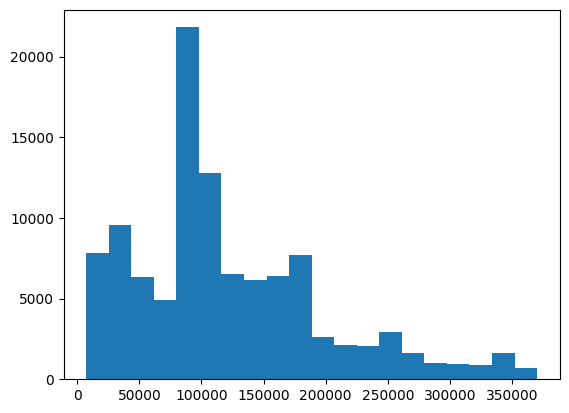

In [51]:
import matplotlib.pyplot as plt
plt.hist(univariate_analysis['Dur. (ms)'],bins=20)
plt.show()


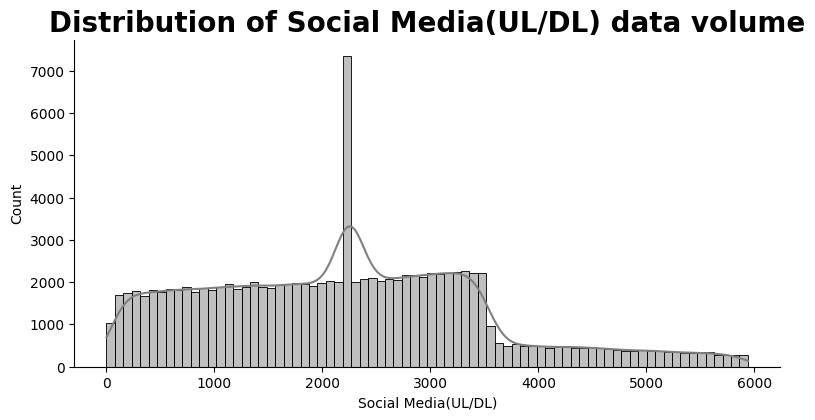

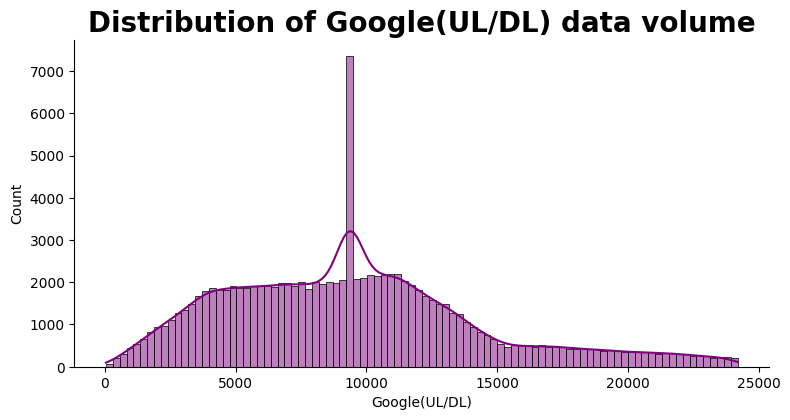

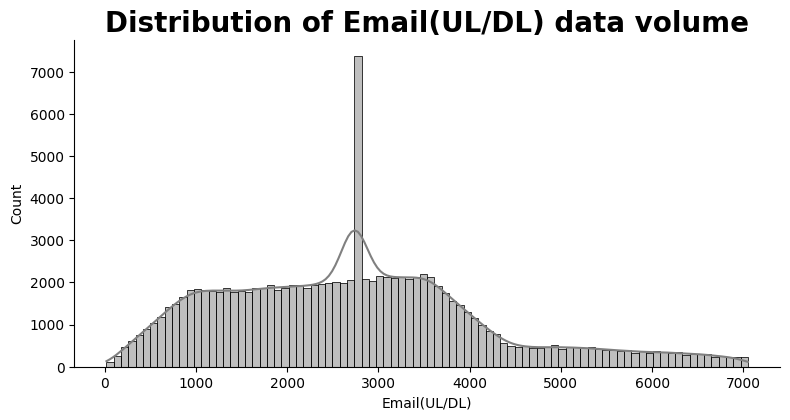

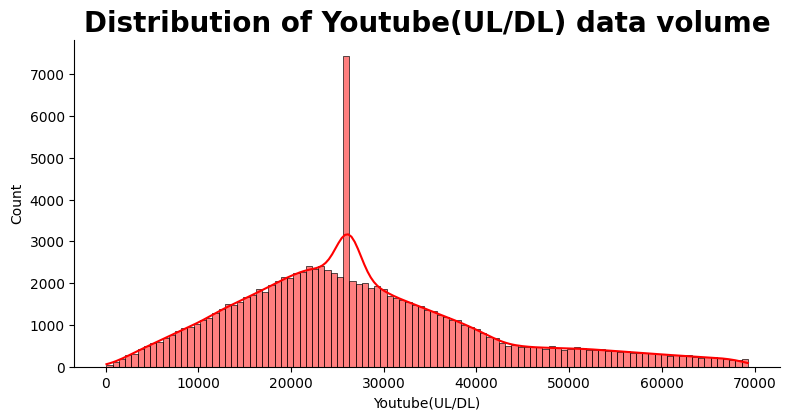

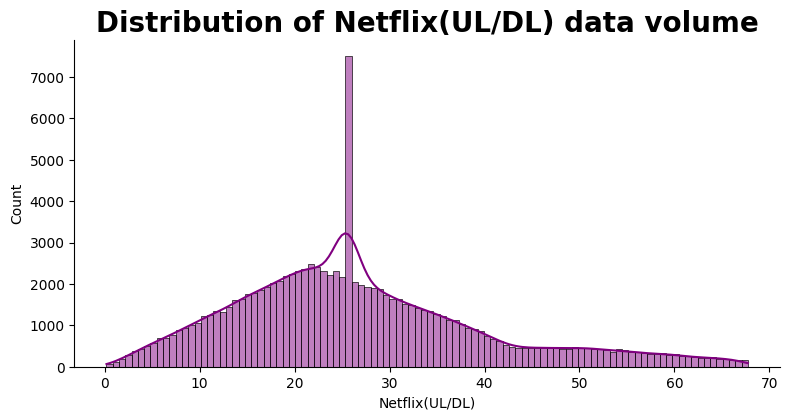

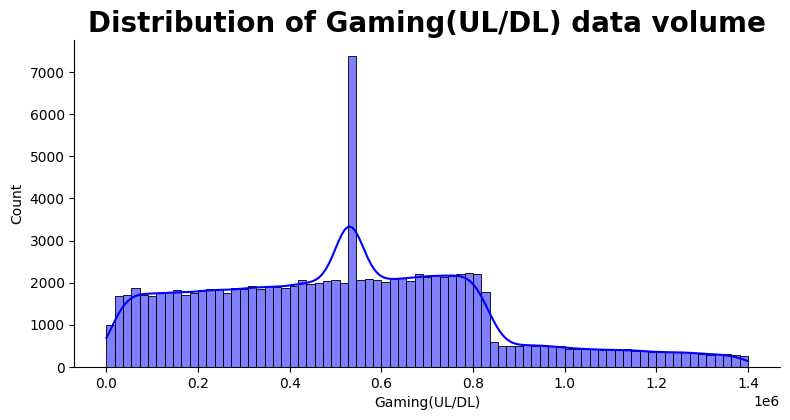

In [52]:
from scripts.plots_univariate import *

showDistribution(univariate_analysis, ['Social Media(UL/DL)', 'Google(UL/DL)', 'Email(UL/DL)','Youtube(UL/DL)',  'Netflix(UL/DL)',  'Gaming(UL/DL)'], ['gray', 'purple', 'gray', 'red', 'purple', 'blue'])

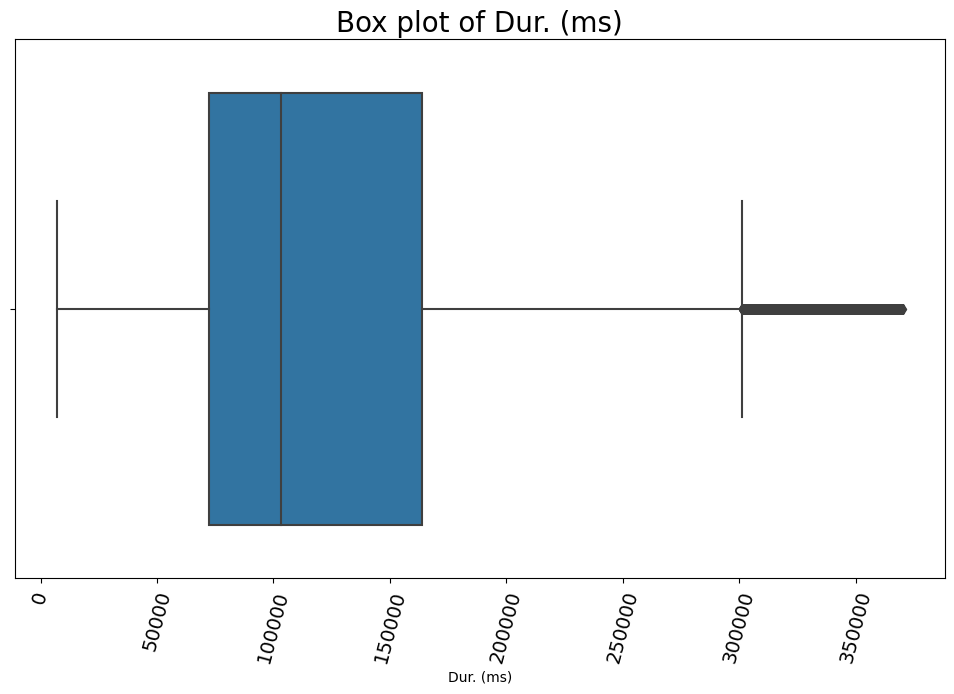

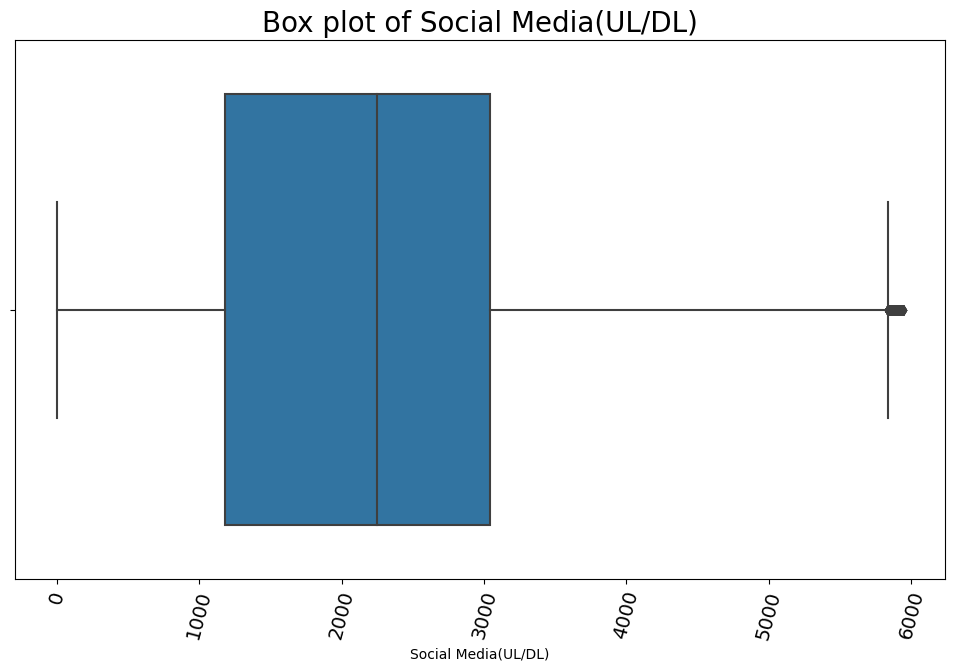

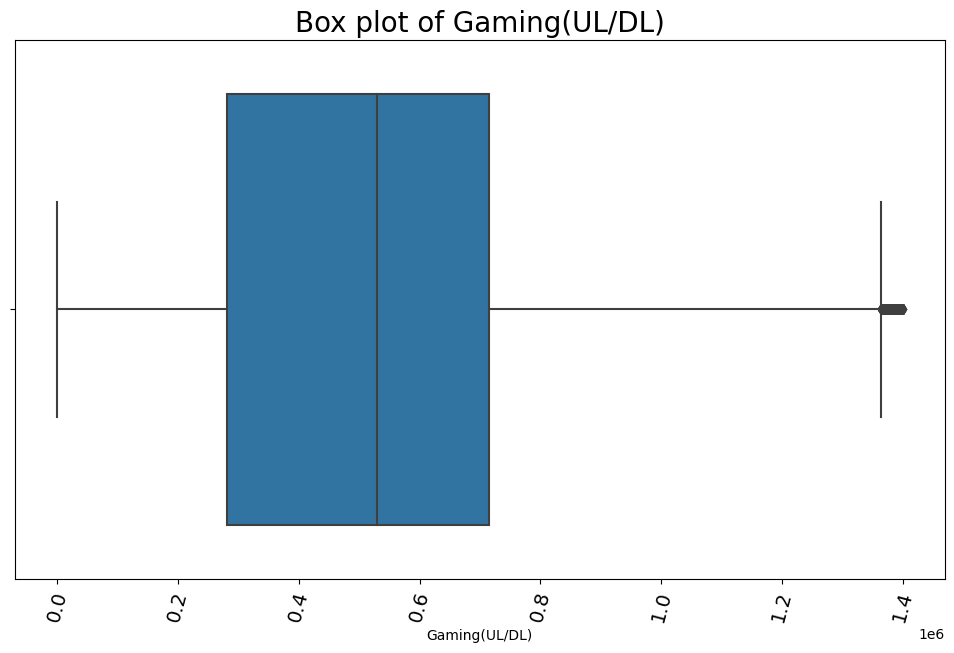

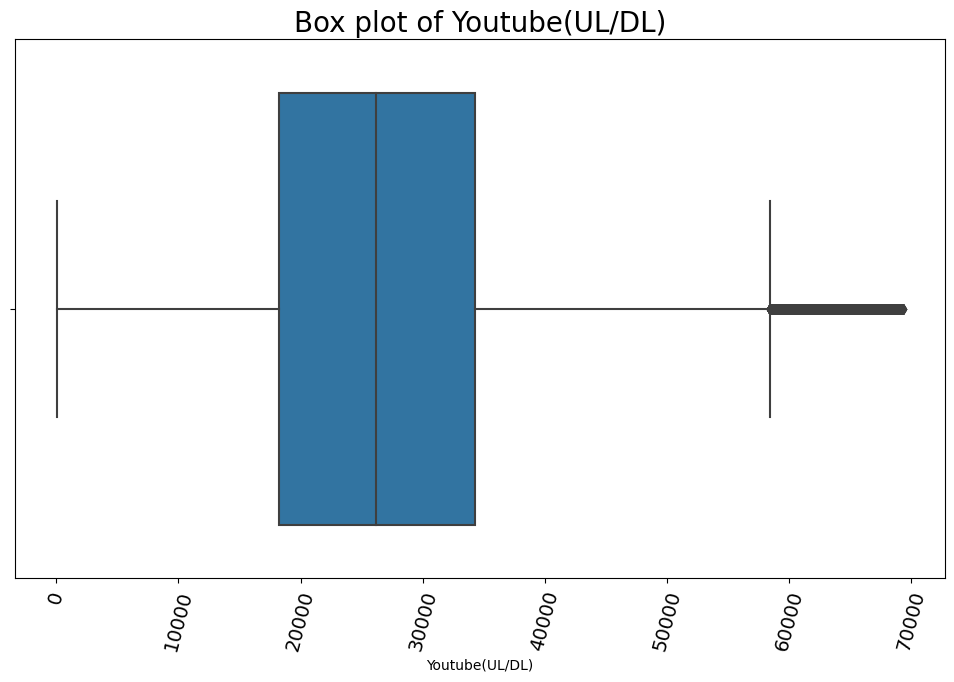

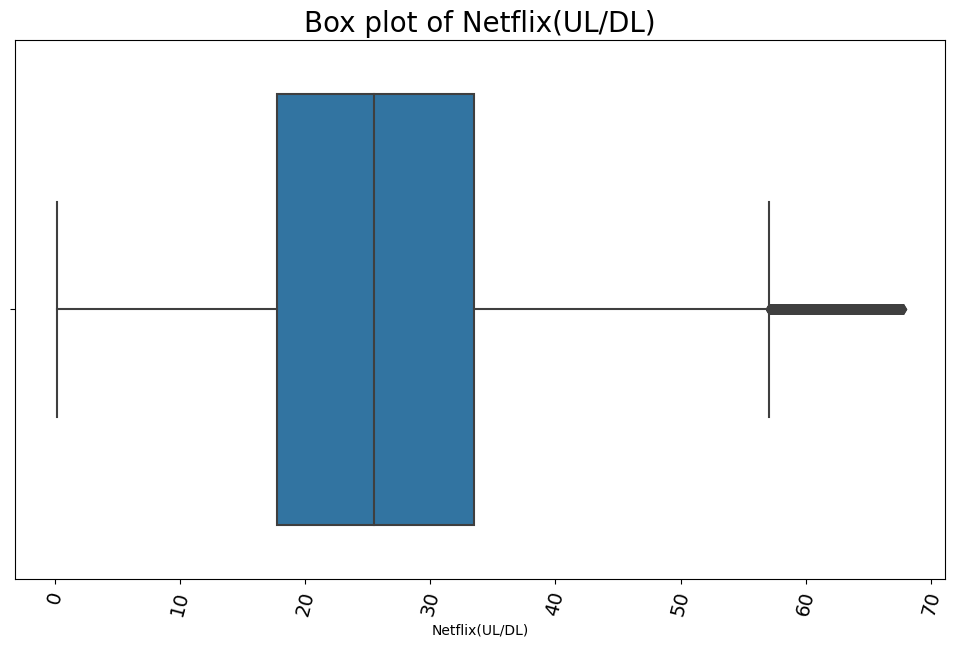

In [53]:
box_plot(univariate_analysis,'Dur. (ms)','Box plot of Dur. (ms)')
box_plot(univariate_analysis,'Social Media(UL/DL)','Box plot of Social Media(UL/DL)')
box_plot(univariate_analysis,'Gaming(UL/DL)','Box plot of Gaming(UL/DL)')
box_plot(univariate_analysis,'Youtube(UL/DL)','Box plot of Youtube(UL/DL)')
box_plot(univariate_analysis,'Netflix(UL/DL)','Box plot of Netflix(UL/DL)')

Multivariate Analysis

In [54]:
multi_analysis = univariate_analysis.copy(deep=True)
multi_analysis.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Social Media(UL/DL),Google(UL/DL),Email(UL/DL),Youtube(UL/DL),Netflix(UL/DL),Gaming(UL/DL),Other(UL/DL),Total(DL/UL),num_xDR_session
0,33601001722.0,1,116720.0,2179.8,4286.1,1300.2,21117.7,25.9,793416.7,377510.6,858096.3,1
1,33601001754.0,1,181230.0,2598.2,5209.8,3230.3,12140.8,10.7,116943.4,275107.5,153183.2,1
2,33601002511.0,1,134969.0,3120.7,3362.4,3130.3,20833.6,18.5,526198.9,489935.2,581998.5,1
3,33601007832.0,1,49878.0,273.7,9451.7,2231.1,6813.8,1.9,381959.1,34452.8,412422.6,1
4,33601008617.0,2,37104.0,2844.3,18066.0,3228.0,40559.6,46.9,1283982.2,785941.9,1423252.9,2


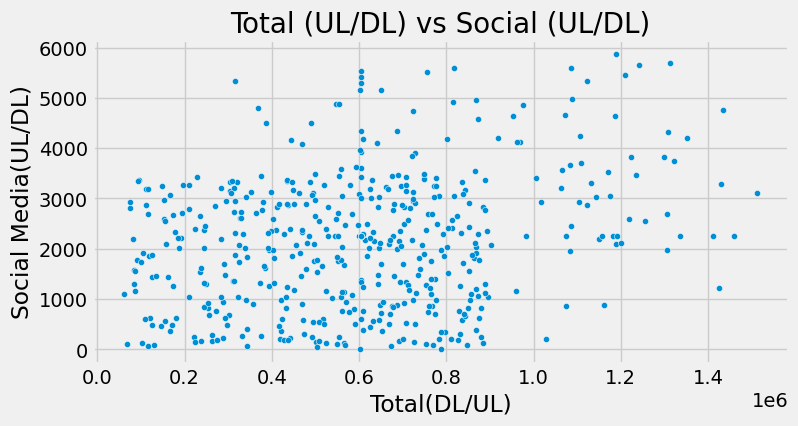

In [55]:
from scripts.plots_multivariate import *
# Plotting a multivariate graph of Social media vs total
plot_scatter(multi_analysis.sample(500), x_col="Total(DL/UL)", y_col="Social Media(UL/DL)", title="Total (UL/DL) vs Social (UL/DL)")

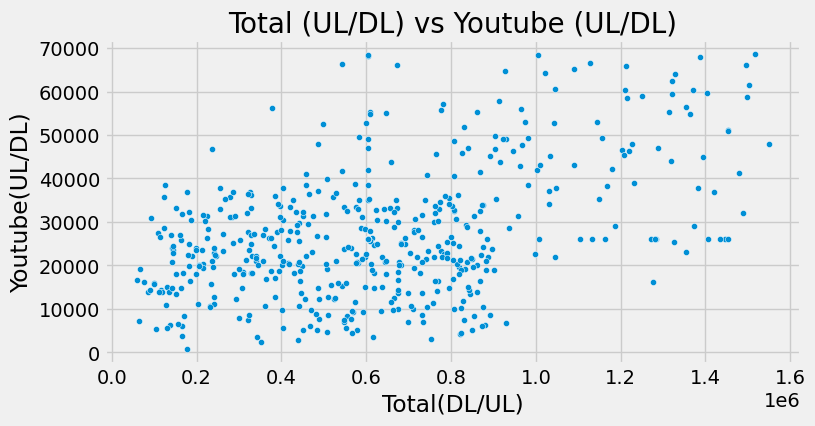

In [56]:
plot_scatter(multi_analysis.sample(500), x_col="Total(DL/UL)", y_col="Youtube(UL/DL)", title="Total (UL/DL) vs Youtube (UL/DL)")

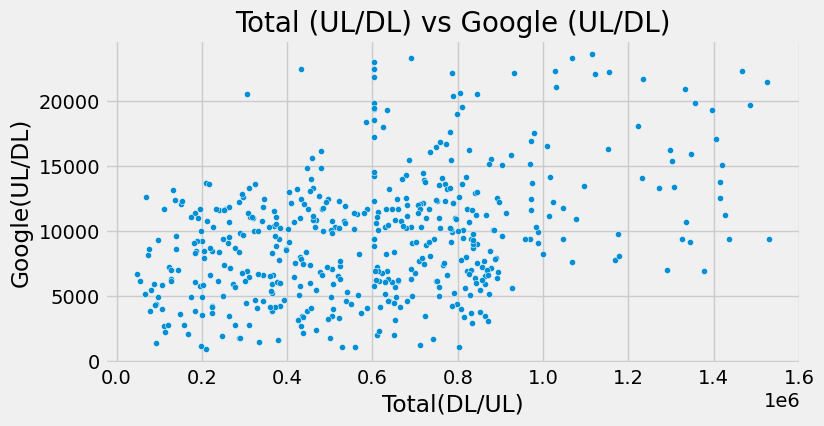

In [57]:
plot_scatter(multi_analysis.sample(500), x_col="Total(DL/UL)", y_col="Google(UL/DL)", title="Total (UL/DL) vs Google (UL/DL)")

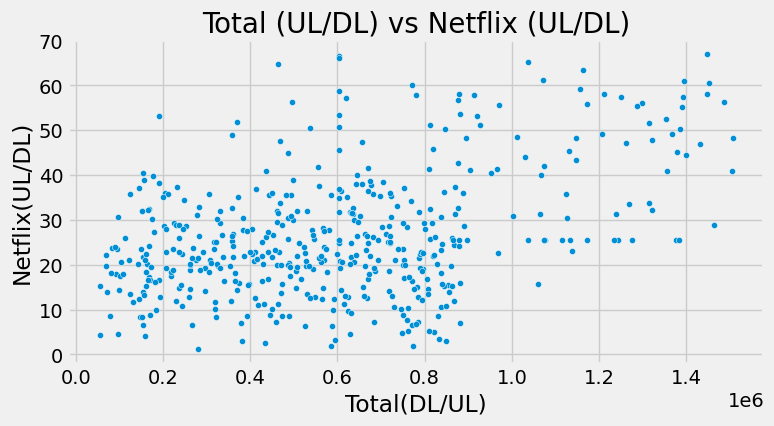

In [58]:
plot_scatter(multi_analysis.sample(500), x_col="Total(DL/UL)", y_col="Netflix(UL/DL)", title="Total (UL/DL) vs Netflix (UL/DL)")

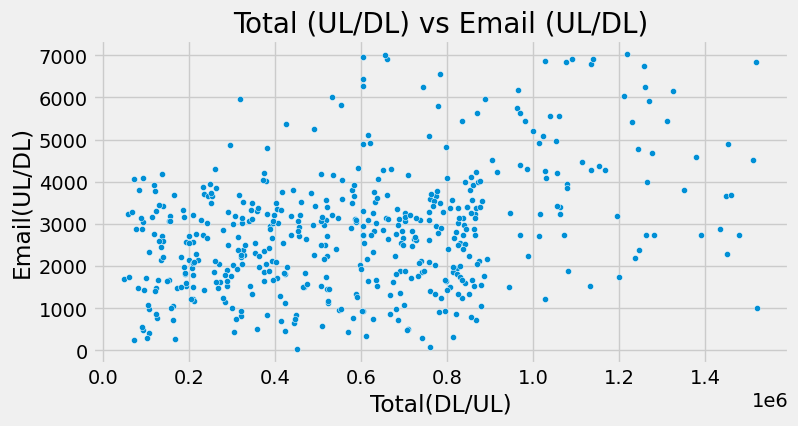

In [59]:
plot_scatter(multi_analysis.sample(500), x_col="Total(DL/UL)", y_col="Email(UL/DL)", title="Total (UL/DL) vs Email (UL/DL)")

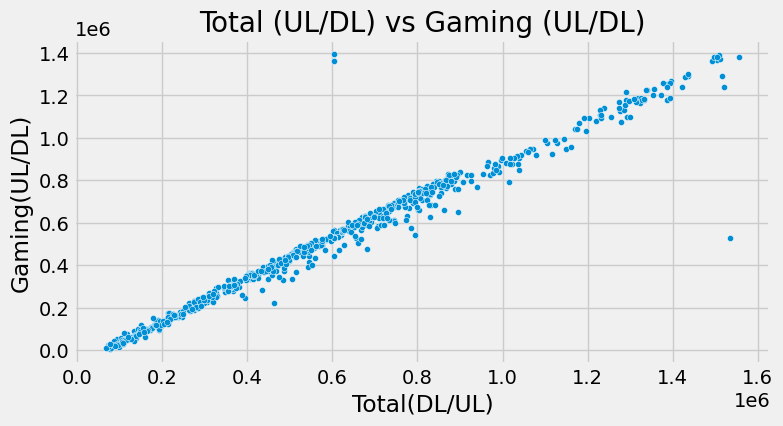

In [60]:
plot_scatter(multi_analysis.sample(700), x_col="Total(DL/UL)", y_col="Gaming(UL/DL)", title="Total (UL/DL) vs Gaming (UL/DL)")

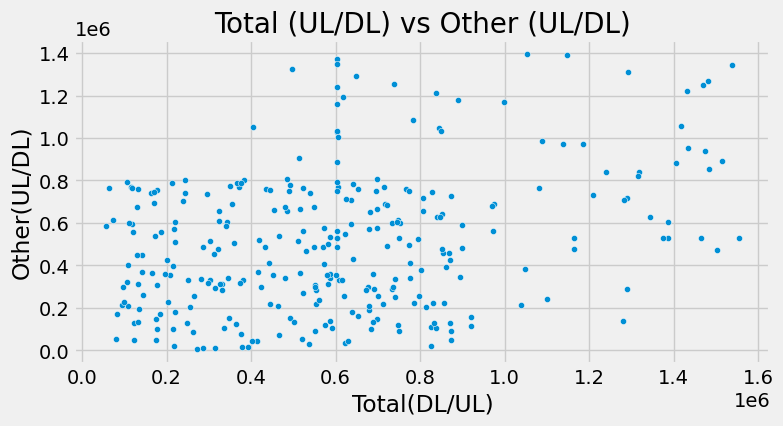

In [61]:
plot_scatter(multi_analysis.sample(300), x_col="Total(DL/UL)", y_col="Other(UL/DL)", title="Total (UL/DL) vs Other (UL/DL)")

In [62]:
# Correlation matrix for the main columns to the analysis

correlated_columns = ['Total(DL/UL)','Other(UL/DL)','Gaming(UL/DL)','Netflix(UL/DL)','Youtube(UL/DL)','Email(UL/DL)','Google(UL/DL)','Social Media(UL/DL)']
sample_data_for_correlation = multi_analysis[correlated_columns]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
corr = sample_data_for_correlation.corr()
corr

,Total(DL/UL),Other(UL/DL),Gaming(UL/DL),Netflix(UL/DL),Youtube(UL/DL),Email(UL/DL),Google(UL/DL),Social Media(UL/DL)
Total(DL/UL),1.000,0.315,0.974,0.405,0.406,0.357,0.375,0.322
Other(UL/DL),0.315,1.000,0.284,0.346,0.351,0.323,0.335,0.291
Gaming(UL/DL),0.974,0.284,1.000,0.348,0.348,0.319,0.331,0.288
Netflix(UL/DL),0.405,0.346,0.348,1.000,0.439,0.402,0.415,0.354
Youtube(UL/DL),0.406,0.351,0.348,0.439,1.000,0.398,0.414,0.354
Email(UL/DL),0.357,0.323,0.319,0.402,0.398,1.000,0.383,0.331
Google(UL/DL),0.375,0.335,0.331,0.415,0.414,0.383,1.000,0.337
Social Media(UL/DL),0.322,0.291,0.288,0.354,0.354,0.331,0.337,1.000


<AxesSubplot:>

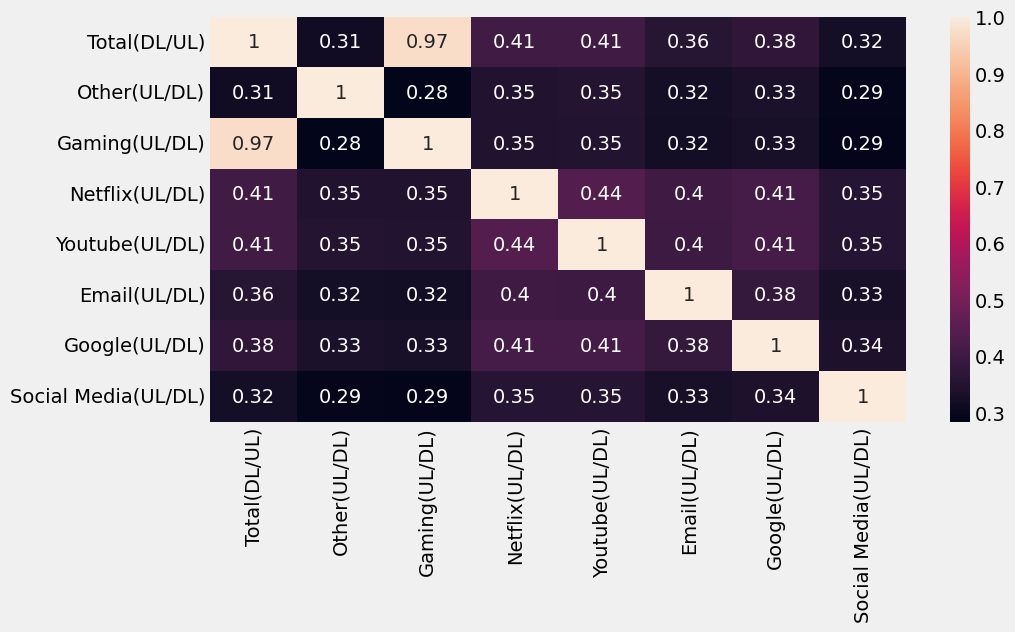

In [63]:
import seaborn as sns
# Correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data=corr, annot = True)

Variable Transformation

In [64]:
variable_trans = clean_df.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum', 'Total(DL/UL)':'sum'}).reset_index()
variable_trans.head(3)

,MSISDN/Number,Dur. (ms),Total(DL/UL)
0,33601001722.000,116720.000,858096.264
1,33601001754.000,181230.000,153183.245
2,33601002511.000,134969.000,581998.519


In [65]:
# segment the users into top five decile classes based on the total duration for all sessions
variable_trans['Decile Rank'] = pd.qcut(variable_trans['Dur. (ms)'],q=5,labels=False)
variable_trans.tail(10)


,MSISDN/Number,Dur. (ms),Total(DL/UL),Decile Rank
106461,33789953832.000,209051.000,1503960.073,4
106462,33789955678.000,98826.000,630642.272,2
106463,33789960306.000,157069.000,693640.210,3
106464,33789967113.000,160461.000,203245.183,3
106465,33789980299.000,210389.000,1069036.510,4
106466,33789996170.000,8810.000,697892.228,0
106467,33789997247.000,140988.000,469050.132,3
106468,3197020876596.000,877385.000,226683.565,4
106469,337000037000919.000,253030.000,582312.328,4
106470,882397108489451.000,869844.000,135892.232,4


In [66]:
# Total data (DL+UL) per decile class. 
variable_trans.groupby('Decile Rank')['Total(DL/UL)'].sum()

Decile Rank
0   11259579261.663
1   12099981565.327
2   11384348120.768
3   13605199820.649
4   23552073178.233
Name: Total(DL/UL), dtype: float64

Dimensionality Reduction

In [67]:
dimension_reduction = univariate_analysis
column_list = ['Bearer Id', 'MSISDN/Number', 'Dur. (ms)', 'num_xDR_session', 'Total(DL/UL)']
dimension_reduction.drop(column_list, inplace = True, axis =1)

In [68]:
#Dimensionality reduction
from sklearn.preprocessing import StandardScaler
dimension_reduction= StandardScaler().fit_transform(dimension_reduction)
dimension_reduction
# changing numpy array to DataFrame
dimension_reduction = pd. DataFrame(dimension_reduction, columns=['Social Media(UL/DL)','Google(UL/DL)','Email(UL/DL)','Youtube(UL\DL)','Netflix(UL\DL)','Gaming_UL_DL','Other_UL_DL']) 
dimension_reduction.head(5)

,Social Media(UL/DL),Google(UL/DL),Email(UL/DL),Youtube(UL\DL),Netflix(UL\DL),Gaming_UL_DL,Other_UL_DL
0,-0.021,-1.058,-0.991,-0.466,-0.063,0.901,-0.461
1,0.302,-0.869,0.343,-1.128,-1.209,-1.323,-0.797
2,0.705,-1.246,0.274,-0.486,-0.625,0.023,-0.092
3,-1.491,-0.002,-0.348,-1.521,-1.876,-0.452,-1.588
4,0.492,1.759,0.342,0.969,1.518,2.515,0.880


In [69]:
# principal component analysis
from sklearn.decomposition import PCA
p_analysis  = PCA()
application_pca = p_analysis.fit_transform(dimension_reduction)
# changing numpy array to DataFrame
application_pca = pd. DataFrame(application_pca, columns=['Social Media(UL/DL)','Google(UL/DL)','Email(UL/DL)','Youtube(UL/DL)','Netflix(UL/DL)','Gaming(UL/DL)','Other(UL/DL)']) 
application_pca.head(5)

,Social Media(UL/DL),Google(UL/DL),Email(UL/DL),Youtube(UL/DL),Netflix(UL/DL),Gaming(UL/DL),Other(UL/DL)
0,-0.867,1.055,0.111,-0.996,-0.082,-0.605,-0.322
1,-1.791,-0.657,-1.036,-0.042,1.041,0.524,0.114
2,-0.612,-0.028,-0.510,-0.919,1.107,-0.209,0.110
3,-2.753,0.801,0.068,0.742,0.196,1.410,0.321
4,3.188,1.401,0.775,-0.271,-0.864,0.279,-0.414
